# Julia Shaw 17.1 ([Bio](https://games.crossfit.com/athlete/259720))

<table style="float: left;border-style:hidden">
<tr style="border-style:hidden">
<td>
Age: 20 ans
</td>
</tr>
<tr style="border-style:hidden"><td>
Poids: 140 lbs
</td></tr>
<tr style="border-style:hidden"><td>
Taille:  170 cm
</td></tr>
</table>


<img style="float: right;" src="pic.jpeg">

## First attempt

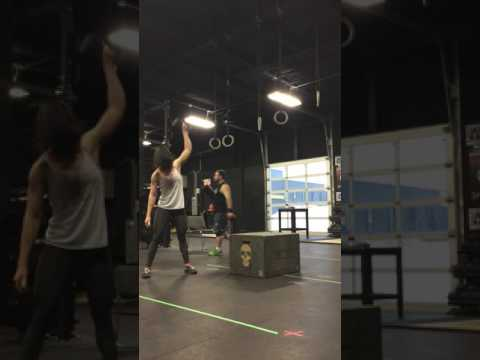

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("pXmIklJztqY")

## Methodology

* The time at each snatch was at the top position
* The time at each burpees was when the feet touch the ground on the other side of the box
* Time was taken with iPhone app [stopwatch](https://itunes.apple.com/ca/app/stopwatch-timer-pro-multiple-count-down-up/id412538313?l=fr&mt=8)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import datetime
import time
import math

In [4]:
# Read and convert checkpoints
checkpoints = [l.split('-')[1].strip() for l in open('redo.txt').readlines()[1:-1]][::-1]
checkpoints = np.array([datetime.datetime.strptime(cp, "%H:%M:%S.%f") for cp in checkpoints])

In [5]:
# Convert checkpoints to split times
splits = (checkpoints - np.roll(checkpoints, 1))[1:]
splits = [split.total_seconds() for split in splits]

In [6]:
# Create a few labels
snatch = ['snatch'] * 10
burpees = ['burpees'] * 15
mvmt = []
round_ = []
for i in range(1,6):
    mvmt += ['snatch'] * 10 * i + ['burpees'] * 15
    round_ += ['snatch_{}'.format(i)] * 10 * i + ['burpees_{}'.format(i)] * 15

In [7]:
df = DataFrame(
    {
        "rep": range(1,226),
        "mvmt": mvmt,
        "split": splits,
        "round": round_
    }
)

#### Split Times

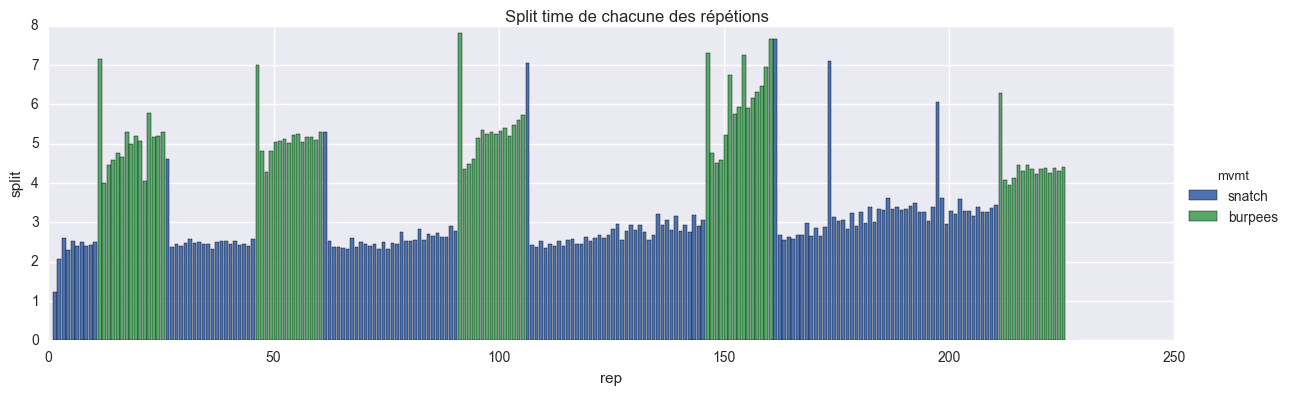

In [8]:
g = sns.FacetGrid(df, size=4, aspect=3, hue='mvmt')
g.map(plt.bar, 'rep', 'split').add_legend()
_ = g.fig.suptitle("Split time de chacune des répétions")

####  Aggregation by round

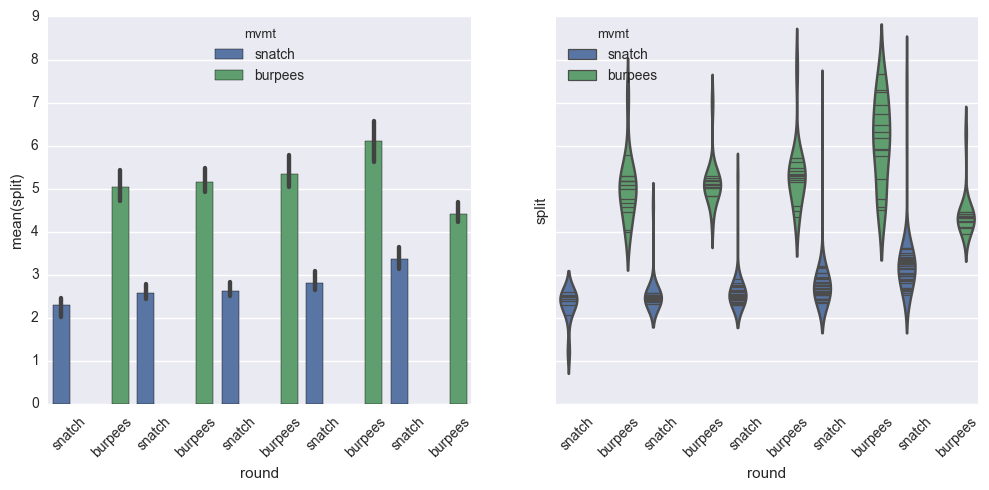

In [15]:
fix, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

g = sns.barplot(data=df, x='round', y='split', hue='mvmt', ax=ax[0])
g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

g = sns.violinplot(data=df, x='round', y='split', hue='mvmt', inner="stick", ax=ax[1])
_ = g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

####  Mean time per movements

In [17]:
df.groupby('mvmt')['split'].mean()

mvmt
burpees    5.215867
snatch     2.893333
Name: split, dtype: float64

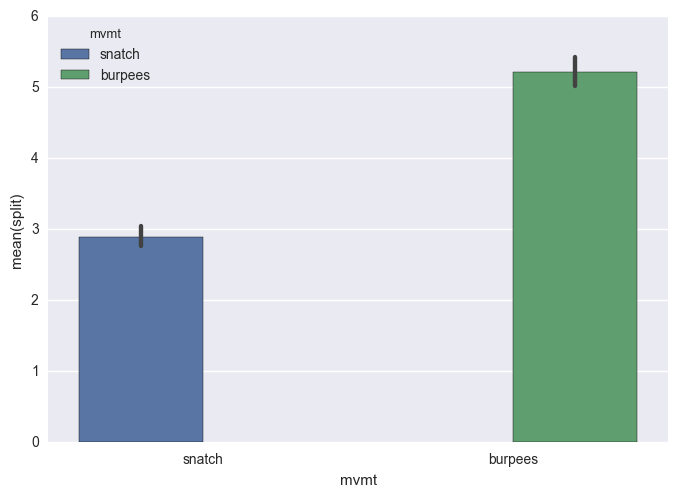

In [10]:
_ = sns.barplot(data=df, x='mvmt', y='split', hue='mvmt')

#### Total time of movements

In [11]:
df.groupby('mvmt').sum()

,rep,split
mvmt,,
burpees,8100,391.19
snatch,17325,434.00


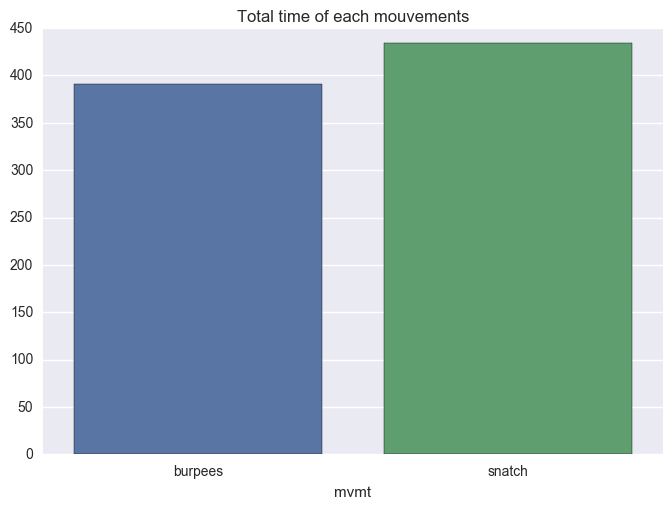

In [12]:
g = sns.barplot(data=df.groupby('mvmt').sum().reset_index(), x='mvmt', y='split')
g.set_ylabel("")
g.set_title("Total time of each mouvements")

#### Simple statistics

Let's look at the total time for the burpees across the rounds. Round 4 and 5 are costly in total time.

In [18]:
_df = df[df['mvmt'] == 'burpees'].groupby('round')['split'].sum().reset_index()
_df

,round,split
0,burpees_1,75.65
1,burpees_2,77.42
2,burpees_3,80.28
3,burpees_4,91.54
4,burpees_5,66.30


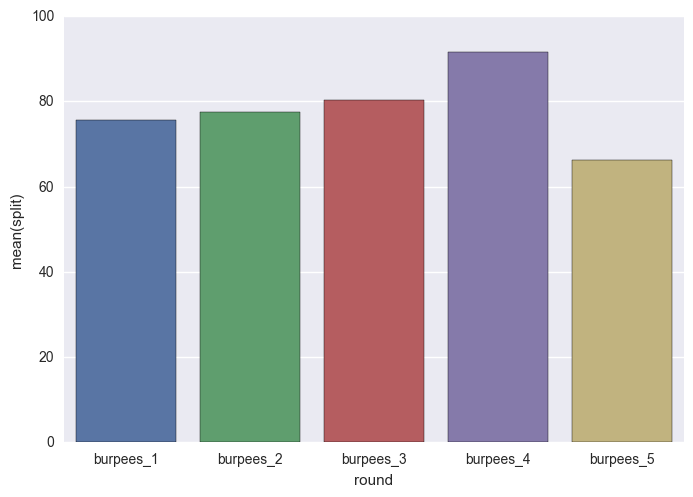

In [19]:
sns.barplot(data=_df, x='round', y='split')